<a href="https://colab.research.google.com/github/akshitamadan/Projects/blob/Image-Segmentation/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

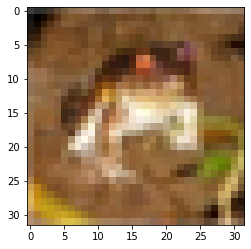

In [5]:
plt.imshow(X_train[0])

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:4]

array([6, 9, 9, 4], dtype=uint8)

In [8]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize =(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

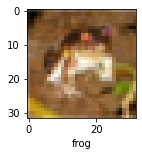

In [10]:
plot_sample(X_train, y_train, 0)

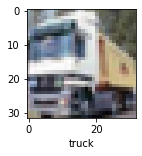

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8133 - accuracy: 0.3525
Epoch 2/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6225 - accuracy: 0.4262
Epoch 3/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5417 - accuracy: 0.4557
Epoch 4/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4803 - accuracy: 0.4804
Epoch 5/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4304 - accuracy: 0.4950


In [14]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4891 - accuracy: 0.4598


[1.4890856742858887, 0.45980000495910645]

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification report: \n", classification_report(y_test, y_pred_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.72      0.26      0.38      1000
           1       0.69      0.39      0.49      1000
           2       0.38      0.30      0.34      1000
           3       0.40      0.21      0.27      1000
           4       0.44      0.41      0.42      1000
           5       0.37      0.43      0.39      1000
           6       0.50      0.60      0.55      1000
           7       0.52      0.59      0.55      1000
           8       0.38      0.83      0.53      1000
           9       0.49      0.59      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



In [16]:
pip install --upgrade scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


In [24]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [25]:
cnn.compile(optimizer = 'adam',
            loss='sparse_categorical_crossentropy',
            metrics='accuracy')


In [28]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5844 - accuracy: 0.7956
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5471 - accuracy: 0.8091
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5174 - accuracy: 0.8201
Epoch 4/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4902 - accuracy: 0.8281
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4623 - accuracy: 0.8390
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4380 - accuracy: 0.8437
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.4183 - accuracy: 0.8514
Epoch 8/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3920 - accuracy: 0.8613
Epoch 9/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3733 - accuracy: 0.8677
Epoch 10/20
1563/1563 [==============================] - 5s 3ms/step - loss: 0.355

In [29]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.7436 - accuracy: 0.6709


[1.743641972541809, 0.6708999872207642]

In [30]:
y_test = y_test.reshape(-1,)
y_test[:7]

array([3, 8, 8, 0, 6, 6, 1], dtype=uint8)

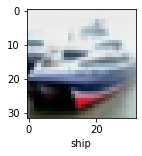

In [32]:
plot_sample(X_test,y_test,1)

In [33]:
 y_pred = cnn.predict(X_test)
 y_pred[:4]

array([[6.3758739e-07, 5.3643630e-12, 3.5838170e-07, 9.7161442e-01,
        3.6404062e-09, 2.8383700e-02, 6.0226347e-07, 2.6356836e-10,
        1.8452289e-07, 1.3229359e-10],
       [1.9289882e-11, 2.0221199e-07, 2.3143759e-18, 2.7518859e-16,
        4.1838664e-23, 2.9430485e-20, 1.8367330e-18, 1.6600313e-21,
        9.9999976e-01, 4.5339426e-09],
       [7.5103223e-01, 4.4151749e-02, 6.5222536e-03, 8.3602071e-02,
        2.8994910e-03, 2.3263617e-04, 1.5399762e-06, 1.1539749e-03,
        1.0636898e-01, 4.0350519e-03],
       [9.9606764e-01, 8.0940801e-05, 1.2656393e-05, 4.6918001e-05,
        1.1205476e-06, 1.0190725e-11, 6.7617090e-09, 4.5570551e-11,
        3.7897285e-03, 9.3456208e-07]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:8]

[3, 8, 0, 0, 6, 6, 1, 6]

In [35]:
y_test[:8]

array([3, 8, 8, 0, 6, 6, 1, 6], dtype=uint8)

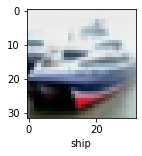

In [36]:
 plot_sample(X_test,y_test,1)

In [38]:
print("Classification report: \n", classification_report(y_test, y_classes))

Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.72      0.70      1000
           1       0.82      0.76      0.79      1000
           2       0.65      0.49      0.56      1000
           3       0.47      0.50      0.49      1000
           4       0.64      0.60      0.62      1000
           5       0.55      0.60      0.57      1000
           6       0.72      0.74      0.73      1000
           7       0.69      0.71      0.70      1000
           8       0.76      0.80      0.78      1000
           9       0.74      0.78      0.76      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

